In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data= pd.read_csv('previous_application.csv')

In [8]:
data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34180 entries, 0 to 34179
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   34180 non-null  int64  
 1   SK_ID_CURR                   34180 non-null  int64  
 2   NAME_CONTRACT_TYPE           34180 non-null  object 
 3   AMT_ANNUITY                  26894 non-null  float64
 4   AMT_APPLICATION              34180 non-null  float64
 5   AMT_CREDIT                   34180 non-null  float64
 6   AMT_DOWN_PAYMENT             16820 non-null  float64
 7   AMT_GOODS_PRICE              26778 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   34180 non-null  object 
 9   HOUR_APPR_PROCESS_START      34180 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  34180 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       34179 non-null  float64
 12  RATE_DOWN_PAYMENT            16819 non-null  float64
 13  RATE_INTEREST_PR

In [11]:
null_cols=data.isnull().sum()
null_cols[null_cols>0]

AMT_ANNUITY                   7286
AMT_DOWN_PAYMENT             17360
AMT_GOODS_PRICE               7402
NFLAG_LAST_APPL_IN_DAY           1
RATE_DOWN_PAYMENT            17361
RATE_INTEREST_PRIMARY        34075
RATE_INTEREST_PRIVILEGED     34075
NAME_CASH_LOAN_PURPOSE           1
NAME_CONTRACT_STATUS             1
DAYS_DECISION                    1
NAME_PAYMENT_TYPE                1
CODE_REJECT_REASON               1
NAME_TYPE_SUITE              16589
NAME_CLIENT_TYPE                 1
NAME_GOODS_CATEGORY              1
NAME_PORTFOLIO                   1
NAME_PRODUCT_TYPE                1
CHANNEL_TYPE                     1
SELLERPLACE_AREA                 1
NAME_SELLER_INDUSTRY             1
CNT_PAYMENT                   7287
NAME_YIELD_GROUP                 1
PRODUCT_COMBINATION              7
DAYS_FIRST_DRAWING           13165
DAYS_FIRST_DUE               13165
DAYS_LAST_DUE_1ST_VERSION    13165
DAYS_LAST_DUE                13165
DAYS_TERMINATION             13165
NFLAG_INSURED_ON_APP

In [12]:
len(data.columns)

37

In [13]:
data.drop(['DAYS_DECISION','NAME_PAYMENT_TYPE','NAME_TYPE_SUITE', 'RATE_INTEREST_PRIVILEGED','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','DAYS_LAST_DUE_1ST_VERSION'],axis=1, inplace=True)

In [14]:
data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [15]:
data['AMT_CREDIT']=data['AMT_CREDIT'].interpolate()

In [16]:
data['PRODUCT_COMBINATION'].value_counts()

POS household with interest       5878
Cash                              5491
POS mobile with interest          4685
Cash X-Sell: middle               2693
Cash X-Sell: low                  2417
Card Street                       2272
POS industry with interest        2189
POS household without interest    1847
Card X-Sell                       1571
Cash Street: high                 1212
Cash X-Sell: high                 1174
Cash Street: low                   749
Cash Street: middle                681
POS other with interest            493
POS mobile without interest        485
POS industry without interest      277
POS others without interest         59
Name: PRODUCT_COMBINATION, dtype: int64

In [17]:
data.shape

(34180, 30)

In [18]:
clean_data=data.dropna(axis=1, thresh=len(data)*0.4)

In [19]:
clean_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Y,1.0,...,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Y,1.0,...,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Y,1.0,...,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Y,1.0,...,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Y,1.0,...,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


In [20]:
clean_data.drop(['DAYS_FIRST_DRAWING'],axis=1,inplace=True)

<ipython-input-20-7df299dfdd93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['DAYS_FIRST_DRAWING'],axis=1,inplace=True)


#Correlation

In [21]:
heat=clean_data.drop(['SK_ID_PREV','SK_ID_CURR'],axis=1).select_dtypes(include=np.number).corr()
#sns.heatmap(data=heat,vmin='-1',vmax='1',cmap='YlGnBu')
heat.corrwith(heat['NFLAG_INSURED_ON_APPROVAL']).sort_values()

DAYS_FIRST_DUE              -0.478900
RATE_DOWN_PAYMENT           -0.281577
DAYS_TERMINATION            -0.230527
DAYS_LAST_DUE               -0.229546
SELLERPLACE_AREA            -0.196953
AMT_DOWN_PAYMENT            -0.185005
NFLAG_LAST_APPL_IN_DAY      -0.162047
AMT_GOODS_PRICE              0.378223
AMT_APPLICATION              0.394389
AMT_CREDIT                   0.412065
AMT_ANNUITY                  0.441052
CNT_PAYMENT                  0.527984
NFLAG_INSURED_ON_APPROVAL    1.000000
dtype: float64

In [22]:
clean_data['DAYS_FIRST_DUE']=clean_data['DAYS_FIRST_DUE'].fillna(clean_data['DAYS_FIRST_DUE'].mean())
clean_data['DAYS_LAST_DUE']=clean_data['DAYS_LAST_DUE'].fillna(clean_data['DAYS_LAST_DUE'].mean())
clean_data['PRODUCT_COMBINATION']=clean_data['PRODUCT_COMBINATION'].fillna('unknown')

<ipython-input-22-eef870f5346b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['DAYS_FIRST_DUE']=clean_data['DAYS_FIRST_DUE'].fillna(clean_data['DAYS_FIRST_DUE'].mean())
<ipython-input-22-eef870f5346b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['DAYS_LAST_DUE']=clean_data['DAYS_LAST_DUE'].fillna(clean_data['DAYS_LAST_DUE'].mean())
<ipython-input-22-eef870f5346b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [23]:
clean_data.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                     7286
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT               17360
AMT_GOODS_PRICE                 7402
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             1
RATE_DOWN_PAYMENT              17361
NAME_CASH_LOAN_PURPOSE             1
NAME_CONTRACT_STATUS               1
CODE_REJECT_REASON                 1
NAME_CLIENT_TYPE                   1
NAME_GOODS_CATEGORY                1
NAME_PORTFOLIO                     1
NAME_PRODUCT_TYPE                  1
CHANNEL_TYPE                       1
SELLERPLACE_AREA                   1
NAME_SELLER_INDUSTRY               1
CNT_PAYMENT                     7287
NAME_YIELD_GROUP                   1
PRODUCT_COMBINATION                0
DAYS_FIRST_DUE                     0
DAYS_LAST_DUE                      0
DAYS_TERMINATION               13165
N

In [24]:
df=clean_data.copy()

In [25]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Y,1.0,...,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,-42.000000,-42.000000,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Y,1.0,...,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,-134.000000,365243.000000,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Y,1.0,...,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,-271.000000,365243.000000,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Y,1.0,...,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,-482.000000,-182.000000,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Y,1.0,...,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,14109.971592,75506.090126,NaN,NaN


#Visualizing the cleaned Data

In [26]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,0.000979,0.002691,-0.000988,0.001373,-0.002185,0.009950,0.004363,-0.012754,0.008645,0.010933,0.004823,-0.000096,-0.000914,-0.000624
SK_ID_CURR,0.000979,1.000000,-0.002990,-0.001686,-0.002473,-0.007139,-0.001675,0.001460,-0.001205,-0.000202,-0.009870,0.003816,-0.012302,-0.013423,-0.004889
AMT_ANNUITY,0.002691,-0.002990,1.000000,0.815285,0.822161,0.273205,0.828037,0.018957,-0.108309,-0.010263,0.392528,-0.054760,0.069109,0.073112,0.295021
AMT_APPLICATION,-0.000988,-0.001686,0.815285,1.000000,0.976157,0.424406,0.999859,0.006204,-0.086599,-0.003733,0.674846,-0.032652,0.123202,0.164629,0.274640
AMT_CREDIT,0.001373,-0.002473,0.822161,0.976157,1.000000,0.267620,0.993736,-0.023368,-0.200941,-0.004682,0.669936,-0.005716,0.150295,0.223101,0.281439
AMT_DOWN_PAYMENT,-0.002185,-0.007139,0.273205,0.424406,0.267620,1.000000,0.424406,-0.004026,0.583824,0.000518,0.001124,-0.023417,-0.046608,-0.051881,-0.051910
AMT_GOODS_PRICE,0.009950,-0.001675,0.828037,0.999859,0.993736,0.424406,1.000000,-0.012781,-0.086599,-0.007302,0.667149,-0.013633,0.154117,0.217421,0.261411
NFLAG_LAST_APPL_IN_DAY,0.004363,0.001460,0.018957,0.006204,-0.023368,-0.004026,-0.012781,1.000000,-0.000595,0.000709,0.063255,0.002580,0.000237,-0.002110,0.004845
RATE_DOWN_PAYMENT,-0.012754,-0.001205,-0.108309,-0.086599,-0.200941,0.583824,-0.086599,-0.000595,1.000000,-0.007282,-0.286185,-0.058812,-0.156339,-0.149799,-0.010872
SELLERPLACE_AREA,0.008645,-0.000202,-0.010263,-0.003733,-0.004682,0.000518,-0.007302,0.000709,-0.007282,1.000000,0.000026,-0.000964,-0.005346,-0.005627,-0.010491


<ipython-input-27-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

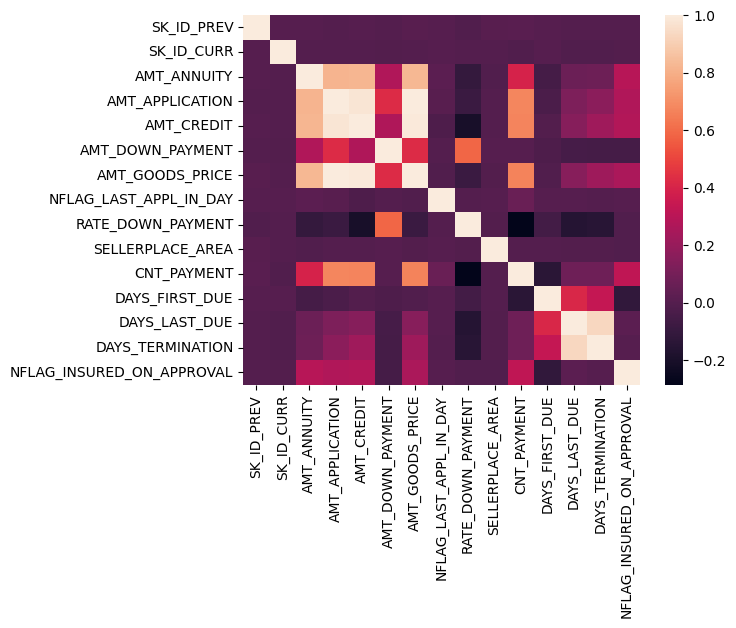

In [27]:
sns.heatmap(df.corr())

([<matplotlib.patches.Wedge at 0x7f4f475d0f10>,
 [Text(0.2675417337695796, 1.0669683316254366, 'Consumer loans'),
  Text(-1.0895203895450019, 0.15147712951369077, 'Revolving loans'),
  Text(0.11746128366673349, -1.0937105864164265, 'XNA'),
  Text(1.0999998327217853, -0.0006066399628120278, 'Cash loans')],
 [Text(0.14593185478340703, 0.5819827263411471, '42.18%'),
  Text(-0.5942838488427282, 0.08262388882564951, '11.24%'),
  Text(0.06406979109094553, -0.5965694107725962, '46.56%'),
  Text(0.5999999087573373, -0.00033089452517019697, '0.02%')])

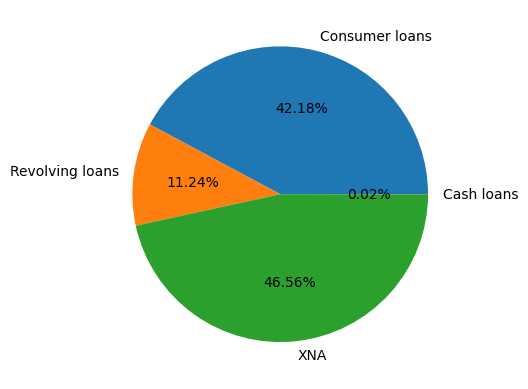

In [28]:
s=list(set(df['NAME_CONTRACT_TYPE']))
val=[len(df[df['NAME_CONTRACT_TYPE']=='Cash loans'])/len(df['NAME_CONTRACT_TYPE'])*100,
     len(df[df['NAME_CONTRACT_TYPE']=='Revolving loans'])/len(df['NAME_CONTRACT_TYPE'])*100,
     len(df[df['NAME_CONTRACT_TYPE']=='Consumer loans'])/len(df['NAME_CONTRACT_TYPE'])*100,
     len(df[df['NAME_CONTRACT_TYPE']=='XNA'])/len(df['NAME_CONTRACT_TYPE'])*100]
plt.pie(val,labels=s,autopct='%1.2f%%')

Contracts Approved :  21737
Contracts Refused :  5964
Contracts Cancelled :  5899
Contracts Unused :  579


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

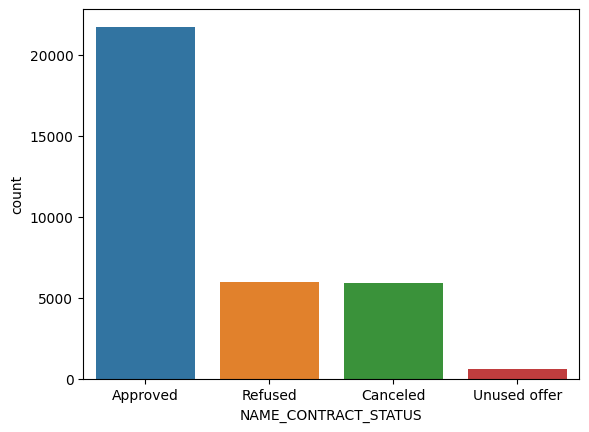

In [29]:
print("Contracts Approved : ",len(df[df['NAME_CONTRACT_STATUS']=='Approved']))
print("Contracts Refused : ",len(df[df['NAME_CONTRACT_STATUS']=='Refused']))
print("Contracts Cancelled : ",len(df[df['NAME_CONTRACT_STATUS']=='Canceled']))
print("Contracts Unused : ",len(df[df['NAME_CONTRACT_STATUS']=='Unused offer']))
sns.countplot(data=df,x=df['NAME_CONTRACT_STATUS'])

Repeater :  24759
New :  6518
Refreshed :  2862
XNA :  40
R :  0 



<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

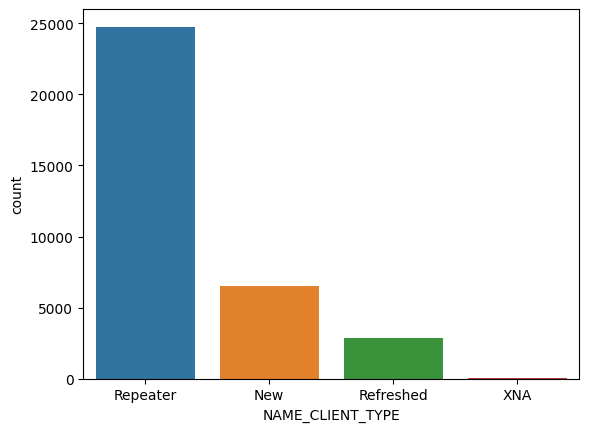

In [30]:
print("Repeater : ",len(df[df['NAME_CLIENT_TYPE']=='Repeater']))
print("New : ",len(df[df['NAME_CLIENT_TYPE']=='New']))
print("Refreshed : ",len(df[df['NAME_CLIENT_TYPE']=='Refreshed']))
print("XNA : ",len(df[df['NAME_CLIENT_TYPE']=='XNA']))
print("R : ",len(df[df['NAME_CLIENT_TYPE']=='R']),'\n')
sns.countplot(data=df,x=df['NAME_CLIENT_TYPE'])

POS :  15070
Cash :  8926
Cards :  2891
XNA :  7286
Cars :  6


<Axes: xlabel='NAME_PORTFOLIO', ylabel='count'>

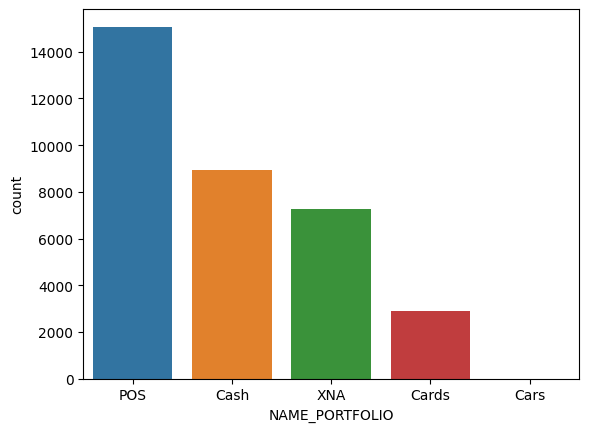

In [51]:
print("POS : ",len(df[df['NAME_PORTFOLIO']=='POS']))
print("Cash : ",len(df[df['NAME_PORTFOLIO']=='Cash']))
print("Cards : ",len(df[df['NAME_PORTFOLIO']=='Cards']))
print("XNA : ",len(df[df['NAME_PORTFOLIO']=='XNA']))
print("Cars : ",len(df[df['NAME_PORTFOLIO']=='Cars']))

sns.countplot(x=df['NAME_PORTFOLIO'])